# Problem Statement

An online food app requires to predict how good or bad a restaurant is and how it might turn out in the future. The business can take the decisions accordingly to include the restaurant in their app or remove it. The data contains 9551 restaurants from all over the world which are currently present in the app. It contains the details about the restaurants and what rating it achieved. We need to create a machine learning model which can predict the Rating of a restaurant based on its characteristics. We need to create a Machine Learning Predictive model which can predict the future Rating of a restaurant.

# Approach

Based on the problem statement we can understand that we need to create a supervised ML Regression model as the target variable which is the Rating of restaurants is Continuous variable. With the help of EDA and Feature Selection techniques we will try to figure out features which are affecting the target variable the most which in turn will be used to build a predictive model to predict continuous output of approximate rating for the given sample of any restaurant characterstics. 
We will test the data on multiple models to achieve comparatively better accuracies.

# Essential Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder 
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Data Gathering

In [2]:
#Importing/Reading the dataset
import pandas as pd
import numpy as np
import warnings
ZomatoData=pd.read_csv('ZomatoData.csv', encoding='latin')
ZomatoData=ZomatoData.drop('Unnamed: 0', axis=1)

ZomatoData.head()

#Displaying first few observations

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


# Initial Data Study

In [3]:
#We will do initial assessment of the data to identify columns as Quantitative, Categorical or Qualitative.

In [4]:
# Looking at sample rows in the data
ZomatoData.head()

,RestaurantID,RestaurantName,CountryCode,City,Address,Locality,LocalityVerbose,Longitude,Latitude,Cuisines,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [5]:
# Observing the summarized information of data
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   RestaurantID          9551 non-null   int64  
 1   RestaurantName        9551 non-null   object 
 2   CountryCode           9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   LocalityVerbose       9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has_Table_booking     9551 non-null   object 
 12  Has_Online_delivery   9551 non-null   object 
 13  Is_delivering_now     9551 non-null   object 
 14  Switch_to_order_menu  9551 non-null   object 
 15  Price_range          

In [6]:
# Looking at the descriptive statistics of the data of only numerical columns
ZomatoData.describe()

,RestaurantID,CountryCode,Longitude,Latitude,Price_range,Votes,Average_Cost_for_two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


In [7]:
# Finding unique values for each column to understand which column is categorical and which one is Continuous
# Typically if the number of unique values are less than 20 then the variable is likely to be a category 
# otherwise it can be considered as continuous
ZomatoData.nunique()

RestaurantID            9551
RestaurantName          7446
CountryCode               15
City                     141
Address                 8918
Locality                1208
LocalityVerbose         1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has_Table_booking          2
Has_Online_delivery        2
Is_delivering_now          2
Switch_to_order_menu       1
Price_range                4
Votes                   1012
Average_Cost_for_two     140
Rating                    33
dtype: int64

  Basic Data Exploration Results: The selected columns in this step are not final & further study will be done
- Restaurant ID: All unique values. Rejected.
- Restaurant Name: Qualitative, too many unique values. Rejected.
- Country Code: Categorical(Location information). #Selected.
- City: Categorical(Location information). #Selected
- Address: Qualitative. Rejected.
- Locality: Qualitative. Rejected.
- Locality Verbose: Qualitative. Rejected.
- Longitude: Continuous & unique values. #Rejected. City will represent the location of restaurant
- Latitude: Continuous & unique values. #Rejected. City will represent the location of restaurant
- Cuisines: Qualitative(A new feature can be engineered/derived from it). #Selected.
- Currency: Categorical. Average Cost for Two is better financial predictor. Rejected
- Has Table booking: Categorical. #Selected.
- Has online delivery: Categorical. #Selected.
- Is delivering now: Categorical. #Selected.
- Switch to order menu: Categorical. #Selected.
- Price range: Categorical. #Selected.
- Votes: Continuous. #Selected.
- Average Cost for two: Continuous. #Selected.

In [8]:
# Deleting those columns which are not useful in predictive analysis, detected in initial study
UselessColumns = ['RestaurantID', 'RestaurantName','Longitude','Latitude','Address',
                  'Locality', 'LocalityVerbose','Currency']
ZomatoData = ZomatoData.drop(UselessColumns,axis=1)
ZomatoData.head()

,CountryCode,City,Cuisines,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating
0,162,Makati City,"French, Japanese, Desserts",Yes,No,No,No,3,314,1100,4.8
1,162,Makati City,Japanese,Yes,No,No,No,3,591,1200,4.5
2,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",Yes,No,No,No,4,270,4000,4.4
3,162,Mandaluyong City,"Japanese, Sushi",No,No,No,No,4,365,1500,4.9
4,162,Mandaluyong City,"Japanese, Korean",Yes,No,No,No,4,229,1500,4.8


# Feature Extraction 

The "Cuisines" column would play an important role but it cannot be used directly because it will generate too many dummy variables
Hence, we can count the number of cuisines offered, which can be a number & can be used.

In [9]:
# Creating a new feature in data by deriving it from existing column
# We will further explore the new feature just like other features
ZomatoData['Number_of_Cuisines'] = ZomatoData['Cuisines'].apply(lambda x: len((str(x).split(","))))
ZomatoData = ZomatoData.drop('Cuisines',axis=1)
ZomatoData.head()

,CountryCode,City,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Switch_to_order_menu,Price_range,Votes,Average_Cost_for_two,Rating,Number_of_Cuisines
0,162,Makati City,Yes,No,No,No,3,314,1100,4.8,3
1,162,Makati City,Yes,No,No,No,3,591,1200,4.5,1
2,162,Mandaluyong City,Yes,No,No,No,4,270,4000,4.4,4
3,162,Mandaluyong City,No,No,No,No,4,365,1500,4.9,2
4,162,Mandaluyong City,Yes,No,No,No,4,229,1500,4.8,2


# Exploratory Data Analysis (EDA)

In [10]:
ZomatoData.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CountryCode           9551 non-null   int64  
 1   City                  9551 non-null   object 
 2   Has_Table_booking     9551 non-null   object 
 3   Has_Online_delivery   9551 non-null   object 
 4   Is_delivering_now     9551 non-null   object 
 5   Switch_to_order_menu  9551 non-null   object 
 6   Price_range           9551 non-null   int64  
 7   Votes                 9551 non-null   int64  
 8   Average_Cost_for_two  9551 non-null   int64  
 9   Rating                9551 non-null   float64
 10  Number_of_Cuisines    9551 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 820.9+ KB


To get best possible information from visual\graphical methods-
- For Categorical & Discrete variables: Count plot, Bar plot
- For Continuous variables: Histogram

In [11]:
#Categorical & Discrete columns list 
catcols = []
for i in ZomatoData.columns:
     if (ZomatoData[i].nunique())<30:
        catcols.append(i)
catcols 

['CountryCode',
 'Has_Table_booking',
 'Has_Online_delivery',
 'Is_delivering_now',
 'Switch_to_order_menu',
 'Price_range',
 'Number_of_Cuisines']

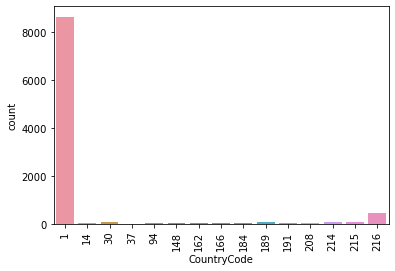

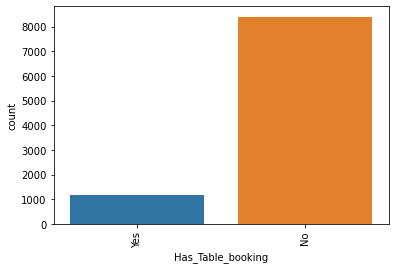

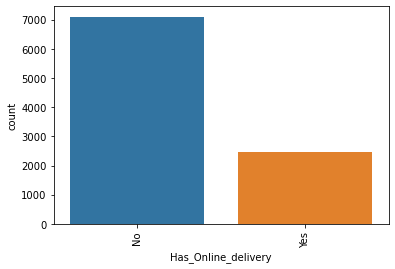

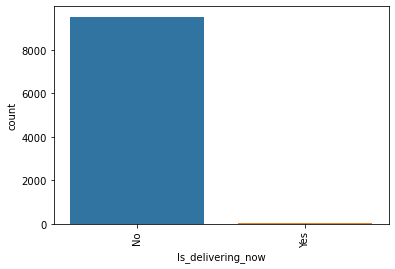

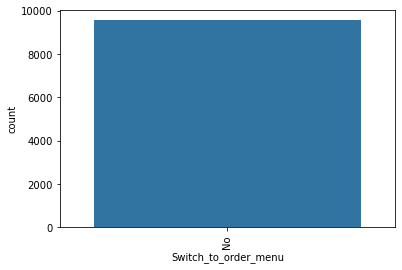

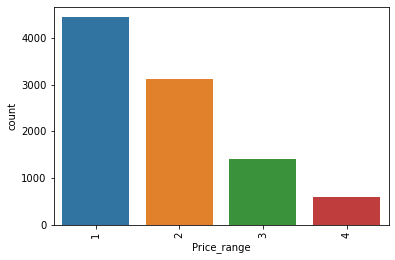

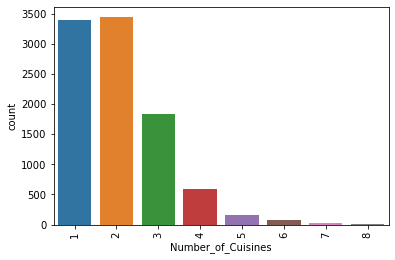

In [12]:
#Plotting countplot for Categorical columns

for i in catcols:
    sns.countplot(data=ZomatoData, x=i)
    plt.xticks(rotation=90)
    plt.show()

Count plot Interpretation:

If there is a column which shows one dominant bar and the other categories are present in very low numbers, these kind of columns may not be very helpful in machine learning. We confirm this in the correlation analysis section and take a final call to select or reject the column.
In this data, "Country Code", "Currency", "is delivering now" and "Switch to order menu" are too skewed. There is just one bar which is dominating and other categories have very less rows or there is just one value. Such columns are not correlated with the target variable because there is no information to learn. The algorithms cannot find any rule or relation.
Hence, selected Categorical Variables:

- Only four categorical variables are selected for further analysis:- 
'Has Table booking', 'Has Online delivery', 'Price range', 'Number_of_Cuisines'

In [13]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CountryCode           9551 non-null   int64  
 1   City                  9551 non-null   object 
 2   Has_Table_booking     9551 non-null   object 
 3   Has_Online_delivery   9551 non-null   object 
 4   Is_delivering_now     9551 non-null   object 
 5   Switch_to_order_menu  9551 non-null   object 
 6   Price_range           9551 non-null   int64  
 7   Votes                 9551 non-null   int64  
 8   Average_Cost_for_two  9551 non-null   int64  
 9   Rating                9551 non-null   float64
 10  Number_of_Cuisines    9551 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 820.9+ KB


Visualizing distribution of all the Continuous(Numeric) variables in the data using Histograms

In [14]:
#Continuous columns list

contcols = []
for i in ZomatoData.columns:
    if (ZomatoData[i].nunique())>30 and (ZomatoData[i].dtype=='float64' or ZomatoData[i].dtype=='int64'):
        contcols.append(i)
contcols

['Votes', 'Average_Cost_for_two', 'Rating']

array([[<AxesSubplot: title={'center': 'Votes'}>,
        <AxesSubplot: title={'center': 'Average_Cost_for_two'}>],
       [<AxesSubplot: title={'center': 'Rating'}>, <AxesSubplot: >]],
      dtype=object)

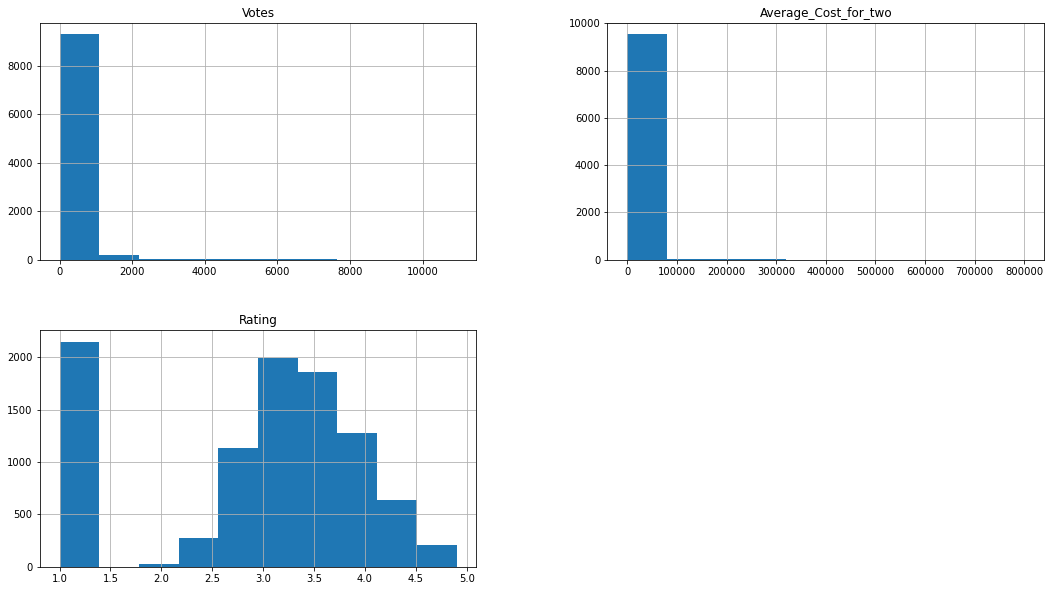

In [15]:
# Plotting histograms of multiple columns together for Continuous columns
ZomatoData.hist(['Votes', 'Average_Cost_for_two', 'Rating'], figsize=(18,10))

Histogram Interpretation - 
The ideal outcome for histogram is a bell curve or slightly skewed bell curve. If there is too much skewness, then outlier treatments, data transformation treatments should be done and the column should be re-examined.
Selected Continuous Variables:
-  Votes: Selected- Outliers seen beyond 4000, need to treat them.
-  Average Cost for two: Selected- Outliers seen beyond 50000, need to treat them.

# Feature Engineering / Data Processing

## Removing Duplicates

In [16]:
print('Shape before deleting duplicate values:', ZomatoData.shape)

# Removing duplicate rows if any
ZomatoData=ZomatoData.drop_duplicates()
print('Shape After deleting duplicate values:', ZomatoData.shape)
#No duplicate rows found

Shape before deleting duplicate values: (9551, 11)
Shape After deleting duplicate values: (7692, 11)


## Outlier treatment

In [17]:
#Using z-score method to determine the outliers in continuous(numeric) columns

In [18]:
mean = np.mean(ZomatoData['Average_Cost_for_two'])
std = np.std(ZomatoData['Average_Cost_for_two'])

threshold = 3
outlier = []
for i in ZomatoData['Average_Cost_for_two']:
    z = (float(i)-(mean))/std
    if z > threshold:
        outlier.append(i)
print('outlier in Average_Cost_for_two are', sorted(outlier))

outlier in Average_Cost_for_two are [70000, 100000, 100000, 120000, 150000, 165000, 200000, 200000, 200000, 200000, 200000, 200000, 250000, 250000, 300000, 300000, 350000, 450000, 500000, 800000, 800000]


In [19]:
mean2 = np.mean(ZomatoData['Votes'])
std2 = np.std(ZomatoData['Votes'])

threshold2 = 3
outlier2 = []
for i in ZomatoData['Votes']:
    z2 = (float(i)-(mean2))/std2
    if z2 > threshold2:
        outlier2.append(i)
print('outlier in Votes are', sorted(outlier2))

outlier in Votes are [1616, 1627, 1629, 1636, 1640, 1653, 1658, 1662, 1670, 1681, 1685, 1691, 1699, 1700, 1714, 1715, 1730, 1746, 1753, 1753, 1756, 1758, 1761, 1778, 1801, 1803, 1809, 1810, 1820, 1821, 1821, 1823, 1838, 1840, 1845, 1859, 1863, 1868, 1869, 1878, 1887, 1891, 1902, 1914, 1932, 1934, 1942, 1949, 1959, 1970, 1971, 1980, 1998, 2003, 2019, 2040, 2076, 2083, 2093, 2093, 2131, 2185, 2191, 2212, 2213, 2218, 2224, 2238, 2247, 2252, 2272, 2324, 2333, 2369, 2412, 2416, 2417, 2424, 2460, 2510, 2510, 2514, 2549, 2553, 2584, 2589, 2620, 2639, 2662, 2689, 2724, 2777, 2806, 2826, 2843, 2847, 2860, 3002, 3010, 3010, 3074, 3157, 3164, 3206, 3244, 3311, 3370, 3374, 3413, 3495, 3530, 3533, 3569, 3591, 3697, 3848, 3986, 4085, 4373, 4385, 4464, 4689, 4914, 4986, 5145, 5172, 5288, 5385, 5434, 5705, 5966, 6907, 7574, 7931, 9667, 10934]


Below we are finding out the most logical value to be replaced in place of outliers after looking at 
the histogram & z-score result. From the list of outliers, we will find the value from the column closest to the lowest outlier and we will use that value to replace the outliers.

In [20]:
# Finding nearest values to outliers of Votes column
sorted(ZomatoData['Votes'][ZomatoData['Votes']< (sorted(outlier2)[0])], reverse=True)

ol2 = sorted(ZomatoData['Votes'][ZomatoData['Votes']< (sorted(outlier2)[0])], reverse=True)[0]
ol2 

1607

In [21]:
# Finding nearest values to outliers of Average_Cost_for_two column
sorted(ZomatoData['Average_Cost_for_two'][ZomatoData['Average_Cost_for_two']< (sorted(outlier)[0])], reverse=True)

ol1 = sorted(ZomatoData['Average_Cost_for_two'][ZomatoData['Average_Cost_for_two']< (sorted(outlier)[0])], reverse=True)[0]
ol1 

8000

In [22]:
# Replacing outliers of Votes column with nearest possibe value
ZomatoData['Votes'][ZomatoData['Votes']>ol2 ] = ol2 

In [23]:
# Replacing outliers of Average_Cost_for_two with nearest possibe value
ZomatoData['Average_Cost_for_two'][ZomatoData['Average_Cost_for_two']>ol1] = ol1 

array([[<AxesSubplot: title={'center': 'Votes'}>,
        <AxesSubplot: title={'center': 'Average_Cost_for_two'}>],
       [<AxesSubplot: title={'center': 'Rating'}>, <AxesSubplot: >]],
      dtype=object)

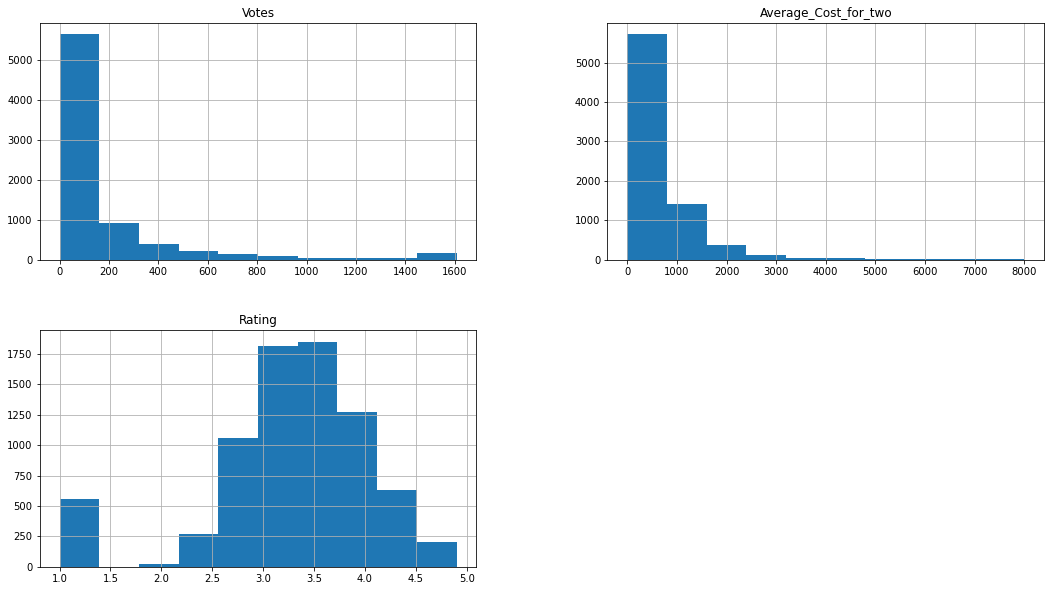

In [24]:
# Plotting histograms of multiple columns together for Continuous columns
ZomatoData.hist(['Votes', 'Average_Cost_for_two', 'Rating'], figsize=(18,10))

Visualizing distribution after outlier treatment
The distribution has improved after the outlier treatment. There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

## Skew Correction for Votes & Average Cost for two columns

After experimenting with trial and error, we are applying cube-root transform for both the Votes and for Average Cost for two columns

In [25]:
ZomatoData['Votes'] = np.cbrt(ZomatoData['Votes'])

<AxesSubplot: xlabel='Votes', ylabel='Count'>

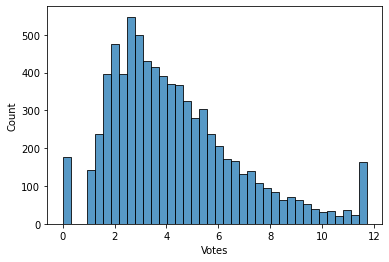

In [26]:
# Distribution after Transformation-
sns.histplot(ZomatoData['Votes'])

In [27]:
ZomatoData['Average_Cost_for_two'] = np.cbrt(ZomatoData['Average_Cost_for_two'])

<AxesSubplot: xlabel='Average_Cost_for_two', ylabel='Count'>

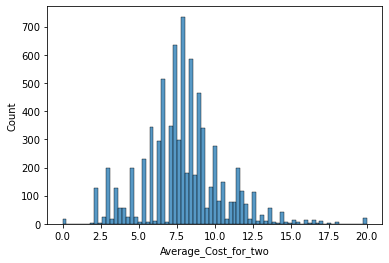

In [28]:
# Distribution after Transformation-
sns.histplot(ZomatoData['Average_Cost_for_two'])

## Missing values treatment

In [29]:
# Finding how many missing values are there for each column
ZomatoData.isnull().sum()

CountryCode             0
City                    0
Has_Table_booking       0
Has_Online_delivery     0
Is_delivering_now       0
Switch_to_order_menu    0
Price_range             0
Votes                   0
Average_Cost_for_two    0
Rating                  0
Number_of_Cuisines      0
dtype: int64

In [30]:
#Hence no requirement of null values treatment

# Feature Selection

It is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.

Visual exploration of relationship between variables
    
    Continuous Vs Continuous - Scatter Plot
    Categorical Vs Continuous - Box Plot
    Categorical Vs Categorical - Grouped by Bar Plots

Statistical measurement of relationship strength between variables
   
    Continuous Target Variable Vs Continuous Predictor - Correlation matrix
    Continuous Target Variable Vs Categorical Predictor - ANOVA test

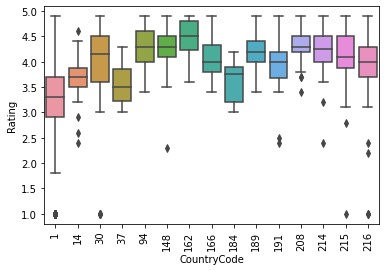

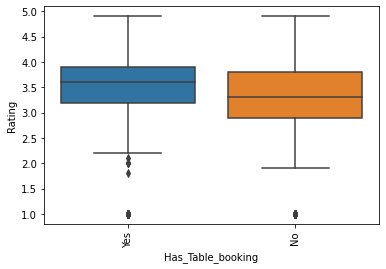

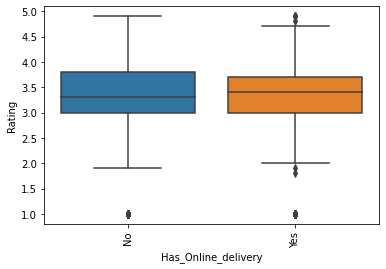

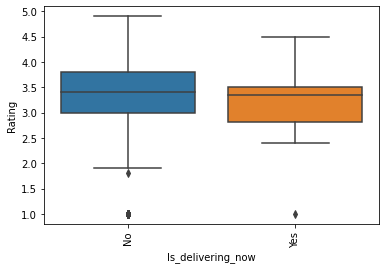

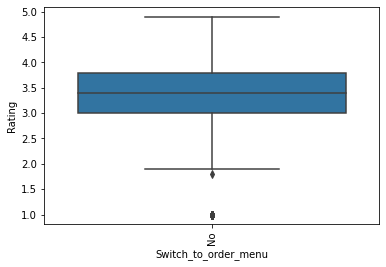

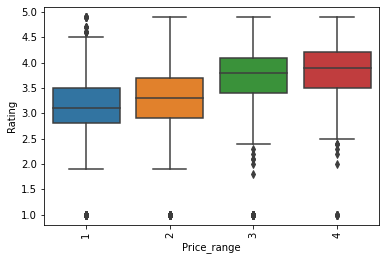

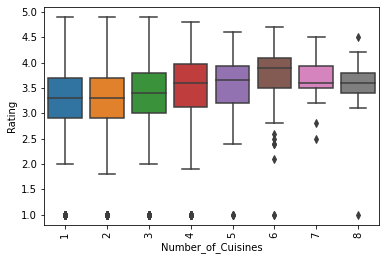

In [31]:
#Distribution of these Categorical & Discrete Variables with Continuous Target Variable-
for i in catcols:
    sns.boxplot(data=ZomatoData, x=i,y='Rating')
    plt.xticks(rotation=90)
    plt.show()

Boxplot Interpretetion:
In case of Boxplots, if the Boxplots are similar for the values then it implies that the values in that column do not have much impact on the target column. Hence from our initial analysis and Boxplot analysis it is clear that the Categorical columns to be selected are- 'Has Table booking', 'Has Online delivery', 'Price range', 'Number_of_Cuisines'


In [32]:
ZomatoData.columns

Index(['CountryCode', 'City', 'Has_Table_booking', 'Has_Online_delivery',
       'Is_delivering_now', 'Switch_to_order_menu', 'Price_range', 'Votes',
       'Average_Cost_for_two', 'Rating', 'Number_of_Cuisines'],
      dtype='object')

In [33]:
#Analysis for continuous columns

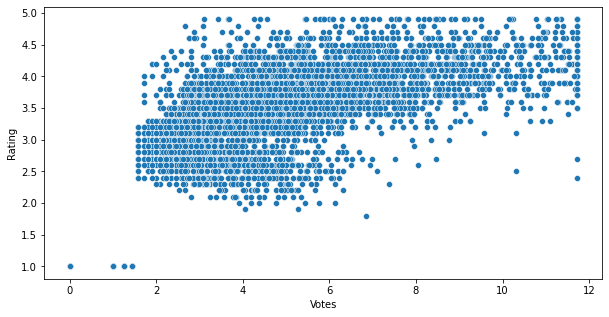

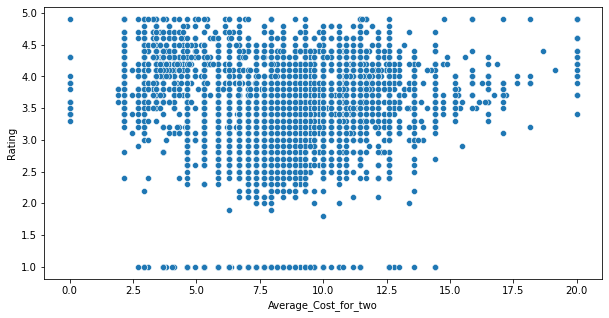

In [34]:
contcols=['Votes', 'Average_Cost_for_two']
# Plotting scatter plot for each continuous column vs the target variable
for i in contcols:
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=ZomatoData, x=i,y='Rating') #hue='Has_Online_delivery')
    plt.show() 

Scatter plots interpretation:
There could be three scenarios:- 1) Increasing Trend: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML!. 2) Decreasing Trend: This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML!. 3) No Trend: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence the predictor cannot be used for ML.
Based on this chart we can get a good idea about the predictor, if it will be useful or not. we can confirm this by looking at the correlation value.

'Average cost for' two column has no impact on target variable hence it can be dropped, we can confirm it with correlation result.

In [35]:
# Calculating correlation matrix for continuous features
contcols=['Rating','Votes', 'Average_Cost_for_two']

# Creating the correlation matrix
CorrelationData=ZomatoData[contcols].corr()
CorrelationData

,Rating,Votes,Average_Cost_for_two
Rating,1.000000,0.672488,0.053653
Votes,0.672488,1.000000,0.194724
Average_Cost_for_two,0.053653,0.194724,1.000000


In [36]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected like in this case
CorrelationData['Rating'][abs(CorrelationData['Rating']) > 0.4]

Rating    1.000000
Votes     0.672488
Name: Rating, dtype: float64

In [37]:
#ANOVA Test

Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test:

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
ANOVA Test result: Probability of H0 being true

In [38]:
from scipy.stats import f_oneway

In [39]:
#We have following Categorical columns-
catcollist = ['Has_Table_booking','Has_Online_delivery','Price_range','Number_of_Cuisines']

In [40]:
for i in catcollist:
    print("ANNOVA Result for :",i,"----",f_oneway(*(ZomatoData.groupby(i)['Rating'].apply(list))))

ANNOVA Result for : Has_Table_booking ---- F_onewayResult(statistic=92.60161622514589, pvalue=8.483368406081311e-22)
ANNOVA Result for : Has_Online_delivery ---- F_onewayResult(statistic=4.815885542060087, pvalue=0.028228378878563165)
ANNOVA Result for : Price_range ---- F_onewayResult(statistic=373.6720800358291, pvalue=1.4563435540003618e-226)
ANNOVA Result for : Number_of_Cuisines ---- F_onewayResult(statistic=13.93788376942137, pvalue=4.5248077777094084e-18)


The results of ANOVA confirm our visual analysis using box plots above. All categorical variables are correlated with the Target variable.
Final selected Categorical columns:
'Has Table booking', 'Has Online delivery', 'Price range', 'Number_of_Cuisines

Selecting final predictors for Machine Learning based on our analysis & tests.
Selecting the final columns for machine learning

In [41]:
SelectedColumns=['Votes','Has_Table_booking','Has_Online_delivery','Price_range','Number_of_Cuisines']

# Selecting final columns
DataForML=ZomatoData[SelectedColumns]
DataForML.head()

,Votes,Has_Table_booking,Has_Online_delivery,Price_range,Number_of_Cuisines
0,6.796884,Yes,No,3,3
1,8.391942,Yes,No,3,1
2,6.463304,Yes,No,4,4
3,7.146569,No,No,4,2
4,6.118033,Yes,No,4,2


In [42]:
DataForML 

,Votes,Has_Table_booking,Has_Online_delivery,Price_range,Number_of_Cuisines
0,6.796884,Yes,No,3,3
1,8.391942,Yes,No,3,1
2,6.463304,Yes,No,4,4
3,7.146569,No,No,4,2
4,6.118033,Yes,No,4,2
...,...,...,...,...,...
9546,9.236528,No,No,3,1
9547,10.112073,No,No,3,3
9548,8.710983,No,No,4,2
9549,9.658468,No,No,4,1


# Data Pre-processing 

In [43]:
#Data Encoding
# Converting the binary nominal variable sex to numeric
DataForML['Has_Table_booking'].replace({'Yes':1, 'No':0}, inplace=True)
DataForML['Has_Online_delivery'].replace({'Yes':1, 'No':0}, inplace=True)

In [44]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Rating']=ZomatoData['Rating']

# Printing sample rows
DataForML_Numeric.head()

,Votes,Has_Table_booking,Has_Online_delivery,Price_range,Number_of_Cuisines,Rating
0,6.796884,1,0,3,3,4.8
1,8.391942,1,0,3,1,4.5
2,6.463304,1,0,4,4,4.4
3,7.146569,0,0,4,2,4.9
4,6.118033,1,0,4,2,4.8


# Holdout Validation

In [45]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['Votes','Has_Table_booking',
           'Has_Online_delivery', 'Price_range', 'Number_of_Cuisines']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

# Feature Scaling

In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#Using Min Max Normalization

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [47]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6153, 5)
(6153,)
(1539, 5)
(1539,)


# Model Building

## KNN (K-Nearest Neighbour)

In [48]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

# Creating the model on Training Data
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value_train:',metrics.r2_score(y_train, y_pred_train))

R2 Value_train: 0.812859507316104


In [49]:
knn_r2_train = metrics.r2_score(y_train, y_pred_train) 

In [50]:
# Measuring Goodness of fit in Testing data
print('R2 Value_test:',metrics.r2_score(y_test, knn.predict(X_test)))

R2 Value_test: 0.7333893371829612


In [51]:
knn_r2_test = metrics.r2_score(y_test, knn.predict(X_test))

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
rscv_KNN = RandomizedSearchCV(knn,{'n_neighbors' : np.arange(5,21), 'p':[1,2]},cv=5)

In [54]:
rscv_KNN.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),
                                        'p': [1, 2]})

In [55]:
rscv_KNN.best_estimator_
#We got best Parameter as:-
#(n_neighbors=9, p=1)

KNeighborsRegressor(n_neighbors=7)

In [56]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
knn_hp = KNeighborsRegressor(n_neighbors=9,p=1)

# Creating the model on Training Data
knn_hp.fit(X_train,y_train)
y_pred_train = knn_hp.predict(X_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value_train:',metrics.r2_score(y_train, y_pred_train))

R2 Value_train: 0.7854620755132129


In [57]:
knn_hp_r2_train = metrics.r2_score(y_train, y_pred_train)

In [58]:
# Measuring Goodness of fit in Testing data
print('R2 Value_test:',metrics.r2_score(y_test, knn_hp.predict(X_test)))

R2 Value_test: 0.7365088640613753


In [59]:
knn_hp_r2_test = metrics.r2_score(y_test, knn_hp.predict(X_test))

## Decision Tree 

In [60]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

# Creating the model on Training Data
DT.fit(X_train,y_train)
y_pred_train = DT.predict(X_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, y_pred_train))

R2 Value: 0.9406773721528371


In [61]:
dt_r2_train = metrics.r2_score(y_train, y_pred_train)

In [62]:
# Creating the model on Testing Data
print('R2 Value_test:',metrics.r2_score(y_test, DT.predict(X_test)))

R2 Value_test: 0.6367620134220056


In [63]:
dt_r2_test = metrics.r2_score(y_test, DT.predict(X_test))

In [64]:
#Hyperparameter Tuning of DT-
from sklearn.model_selection import RandomizedSearchCV

param_grid = {"criterion":['poisson', 'squared_error', 'absolute_error'], 
              'max_depth':[3,5,7,10,15,20], 'min_samples_leaf':np.arange(1,10), 
              'min_samples_split':np.arange(1,10)}
# Good Range of Max_depth = 2 to 20

In [65]:
rscv_DT = RandomizedSearchCV(DT, param_grid, cv=5) 

In [66]:
rscv_DT.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['poisson',
                                                      'squared_error',
                                                      'absolute_error'],
                                        'max_depth': [3, 5, 7, 10, 15, 20],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [67]:
rscv_DT.best_estimator_
#We got best estimators as:-
#(max_depth=7, min_samples_leaf=5, min_samples_split=6)

DecisionTreeRegressor(criterion='poisson', max_depth=7, min_samples_leaf=8,
                      min_samples_split=6)

In [68]:
DT_hpt = DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=7)

In [69]:
#Accuracies for DT_hpt-

# Creating the model on Training Data
DT_hpt.fit(X_train,y_train)
y_pred_train_hpt = DT_hpt.predict(X_train)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value_train_hpt:',metrics.r2_score(y_train, y_pred_train_hpt))

R2 Value_train_hpt: 0.793965656159088


In [70]:
dt_hp_r2_train = metrics.r2_score(y_train, y_pred_train_hpt)

In [71]:
# Creating the model on Testing Data
print('R2 Value_test_hpt:',metrics.r2_score(y_test, DT_hpt.predict(X_test)))

R2 Value_test_hpt: 0.7865832917792573


In [72]:
dt_hp_r2_test = metrics.r2_score(y_test, DT_hpt.predict(X_test))

In [73]:
#Plotting Decision Tree

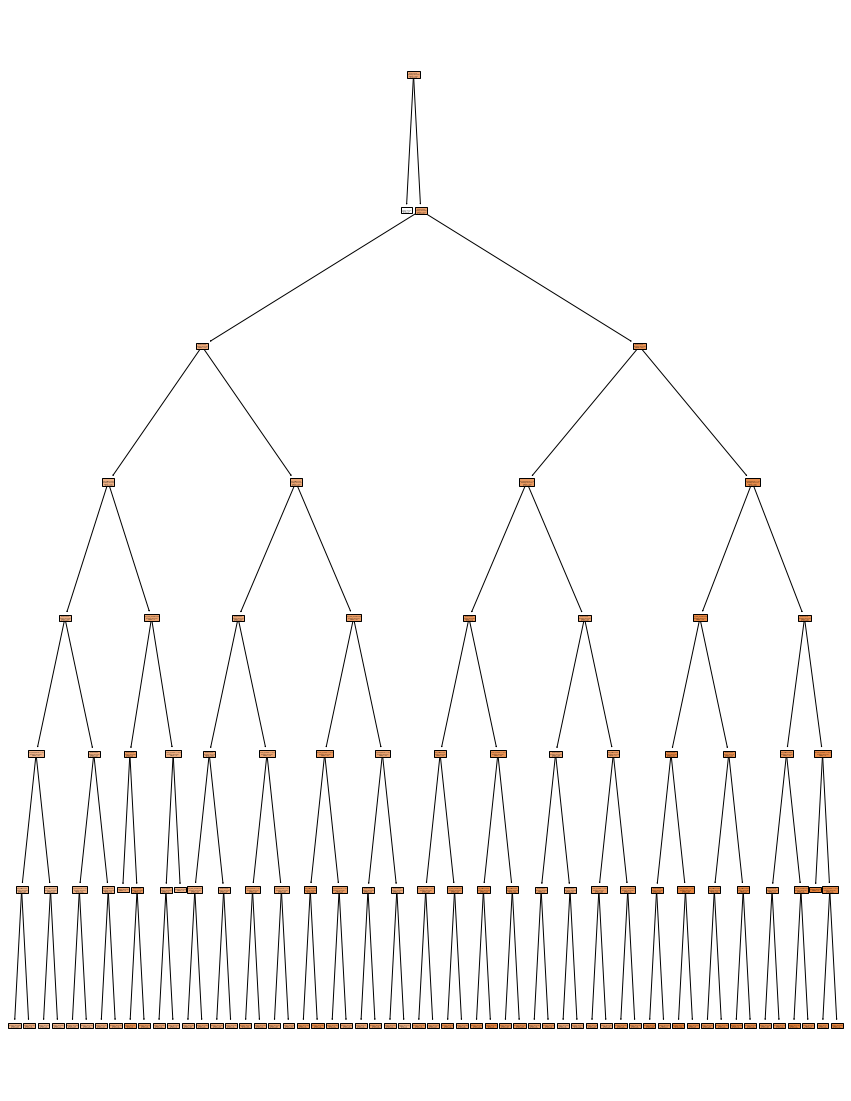

In [74]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,20))
# plt.figure()

tree = plot_tree(DT_hpt,feature_names=Predictors, filled=True)
#plt.savefig('Decision_tree_fully_grown.png')

In [75]:
#Feature Importances
DT_hpt.feature_importances_

array([0.95765072, 0.0076518 , 0.01480376, 0.01436622, 0.00552749])

<AxesSubplot: >

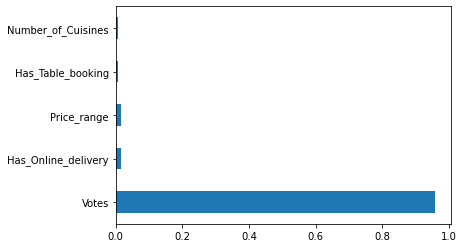

In [76]:
# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(DT_hpt.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')  

#Hence we can say that the most impactful feature for classification is 'Votes'

In [77]:
#Before Hyperparameter Tuning
b4_hpt = pd.DataFrame(columns=['Training R2', 'Testing R2'], index=['KNN', 'DT'], data=[[round(knn_r2_train,3),round(knn_r2_test,3)],[round(dt_r2_train,3),round(dt_r2_test,3)]])
b4_hpt

,Training R2,Testing R2
KNN,0.813,0.733
DT,0.941,0.637


In [78]:
#After Hyperparameter Tuning
aft_hpt = pd.DataFrame(columns=['Training R2', 'Testing R2'], index=['KNN', 'DT'], data=[[round(knn_hp_r2_train,3),round(knn_hp_r2_test,3)],[round(dt_hp_r2_train,3),round(dt_hp_r2_test,3)]])
aft_hpt

,Training R2,Testing R2
KNN,0.785,0.737
DT,0.794,0.787


# Conclusion

Here we can easily notice the major impact of Hyperparameter Tuning on the Decision Tree Regressor model.
The Decision Tree Regressor testing accuracy enhanced drastically. From the comparison between the two models we can conclude that the DT_hpt model has the best combination of bias and variation hence we will select it as our final model.

# Testpoint Creation

In [79]:
#Checking prediction for a random testpoint

In [80]:
#['Votes','Has_Table_booking','Has_Online_delivery', 'Price_range', 'Number_of_Cuisines']
testpoint = [[5,1,0,3,5]]

In [81]:
print("Rating for the testpoint:",testpoint,' is ',DT_hpt.predict(testpoint))

Rating for the testpoint: [[5, 1, 0, 3, 5]]  is  [3.94444444]


# Pickle File Creation 

In [82]:
import pickle as pk 
import joblib as jl  

In [83]:
## Dumping Pickle File

In [84]:
DT_hpt, knn_hp 

(DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, min_samples_split=7),
 KNeighborsRegressor(n_neighbors=9, p=1))

In [85]:
# with open(r"rr_mod.pickle",'wb') as f:
#     pk.dump([DT_hpt, knn_hp], f)

In [86]:
# Loading Pickle File to Check data-

In [87]:
# with open(r'rr_mod.pickle', 'rb') as f:
#     rr_mod = pk.load(f)

In [88]:
# rr_mod[0], rr_mod[1]